# Visión por Computadora 1
## TP 1 
## Alumno: Santiago Fux

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


## Parte 1

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
def to_chromatic_coords(input_image:np.ndarray) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) convertido a coordenadas cromaticas
    '''
    res = np.zeros((input_image.shape[0],input_image.shape[1], input_image.shape[2]))
    for i in range(input_image.shape[0]):
      for j in range(input_image.shape[1]):
        sum = np.sum(input_image[i][j])
        # handle potential error
        if sum == 0:
          sum = 1
        # divide pixel colors by its sum        
        res[i][j] = input_image[i][j] / sum
    return res

In [21]:
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png' ,cv.IMREAD_COLOR)
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png' ,cv.IMREAD_COLOR)
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png' ,cv.IMREAD_COLOR)

# convert from bgr -> rgb before showing
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)


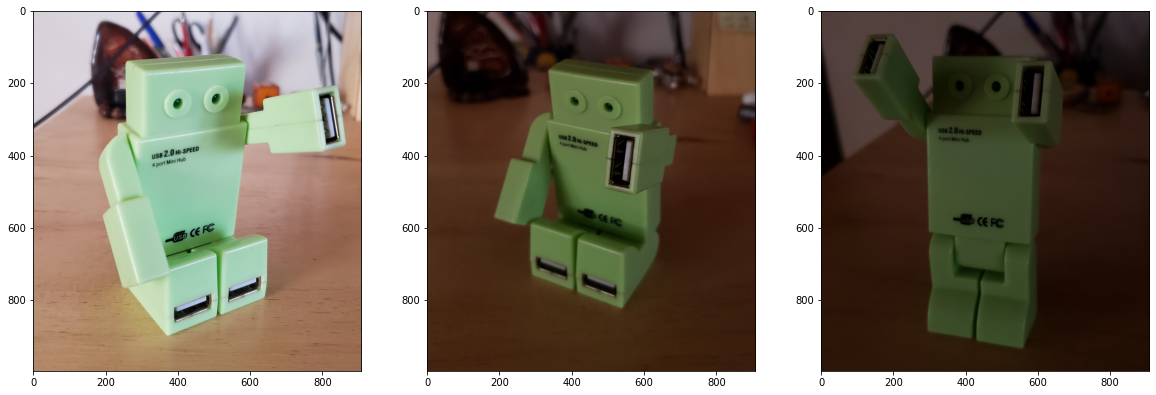

In [22]:
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(img3)

In [23]:
new_img1 = to_chromatic_coords(img1)
new_img2 = to_chromatic_coords(img2)
new_img3 = to_chromatic_coords(img3)


# # comparo un par 
# for i in range(new_img.shape[0]):
#   for j in range(3):
#     print(f'original:R={img[i][j][0]}, G={img[i][j][1]}, B={img[i][j][2]}')
#     print(f'crom:R={new_img[i][j][0]}, G={new_img[i][j][1]}, B={new_img[i][j][2]}')

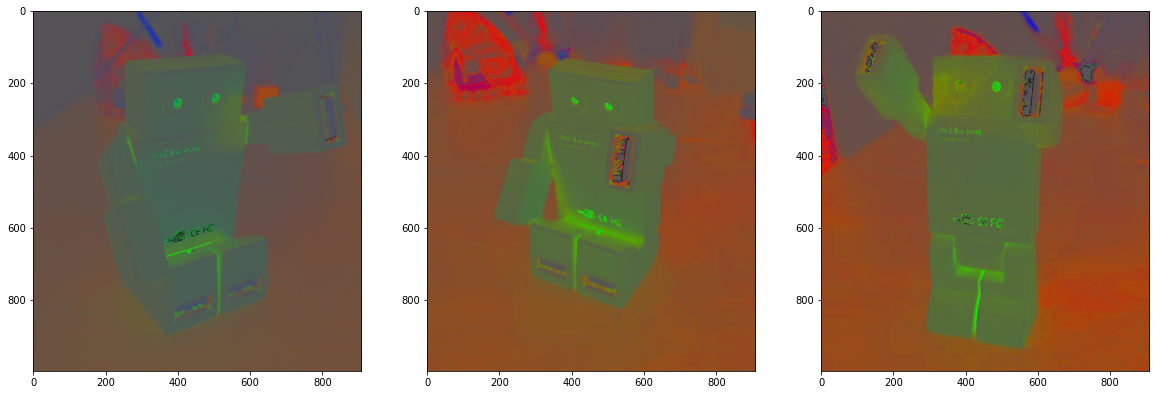

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(new_img1)
plt.subplot(1, 3, 2)
plt.imshow(new_img2)
plt.subplot(1, 3, 3)
plt.imshow(new_img3)

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [112]:
def white_patch(input_image:np.ndarray) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) convertido a coordenadas cromaticas
    '''
    max = np.arange(3)
    max[0] = np.max(input_image[:, :, 0])
    max[1] = np.max(input_image[:, :, 1])
    max[2] = np.max(input_image[:, :, 2])

    res = np.zeros((input_image.shape[0],input_image.shape[1], input_image.shape[2]))
    # for i in range(input_image.shape[0]):
    #   for j in range(input_image.shape[1]):
    #     for z in range(len(max)):
    #       if max[z] > 0:
    #         res[i][j][z] = ((input_image[i][j][z] * 255) / max[z])
    #       else:
    #         pass # TODO
    # return res

    for i in range(2):
      for j in range(2):
        for z in range(len(max)):
          if max[z] > 0:
            res[i][j][z] = ((input_image[i][j][z] * 255) / max[z])
            print(f'input={input_image[i][j][z]}, max={max[z]}, res={res[i][j][z]}')
          else:
            pass # TODO
    return res



In [113]:
max = np.arange(3)
len(max)

3

In [114]:
img2_1 = cv.imread('white_patch/test_red.png' ,cv.IMREAD_COLOR)
img2_2 = cv.imread('white_patch/test_green.png' ,cv.IMREAD_COLOR)
img2_3 = cv.imread('white_patch/test_blue.png' ,cv.IMREAD_COLOR)

# convert from bgr -> rgb before showing
img2_1 = cv.cvtColor(img2_1, cv.COLOR_BGR2RGB)
img2_2 = cv.cvtColor(img2_2, cv.COLOR_BGR2RGB)
img2_3 = cv.cvtColor(img2_3, cv.COLOR_BGR2RGB)

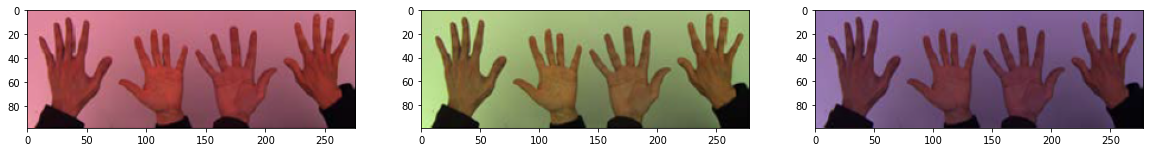

In [115]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(img2_1)
plt.subplot(1, 3, 2)
plt.imshow(img2_2)
plt.subplot(1, 3, 3)
plt.imshow(img2_3)

In [116]:
new_img2_1 = white_patch(img2_1)
new_img2_2 = white_patch(img2_2)
new_img2_3 = white_patch(img2_3)

input=222, max=247, res=229.1902834008097
input=134, max=157, res=217.64331210191082
input=158, max=175, res=230.22857142857143
input=223, max=247, res=230.22267206477733
input=135, max=157, res=219.2675159235669
input=158, max=175, res=230.22857142857143
input=222, max=247, res=229.1902834008097
input=134, max=157, res=217.64331210191082
input=158, max=175, res=230.22857142857143
input=223, max=247, res=230.22267206477733
input=135, max=157, res=219.2675159235669
input=158, max=175, res=230.22857142857143
input=174, max=210, res=211.28571428571428
input=210, max=250, res=214.2
input=128, max=171, res=190.87719298245614
input=180, max=210, res=218.57142857142858
input=213, max=250, res=217.26
input=136, max=171, res=202.80701754385964
input=178, max=210, res=216.14285714285714
input=212, max=250, res=216.24
input=134, max=171, res=199.82456140350877
input=183, max=210, res=222.21428571428572
input=215, max=250, res=219.3
input=142, max=171, res=211.75438596491227
input=139, max=165, re

In [117]:
#solo para debug
np.max(new_img2_1[:,:,0]), np.max(new_img2_1[:,:,1]), np.max(new_img2_1[:,:,2])

(230.22267206477733, 219.2675159235669, 230.22857142857143)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


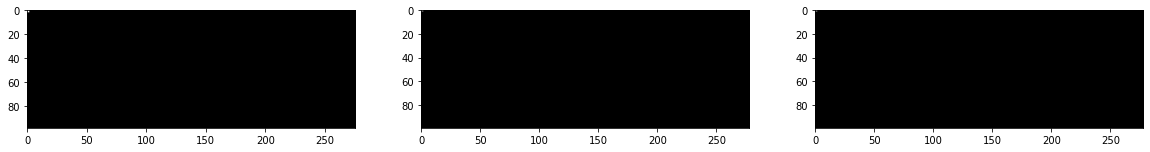

In [118]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(new_img2_1)
plt.subplot(1, 3, 2)
plt.imshow(new_img2_2)
plt.subplot(1, 3, 3)
plt.imshow(new_img2_3)

In [119]:
new_img2_1[0:2, 0:2, :]

array([[[229.1902834 , 217.6433121 , 230.22857143],
        [230.22267206, 219.26751592, 230.22857143]],

       [[229.1902834 , 217.6433121 , 230.22857143],
        [230.22267206, 219.26751592, 230.22857143]]])